In [1]:
## Cleaning of the data

from bs4 import Comment, BeautifulSoup
import re
import time
import requests
import nltk
from nltk.corpus import stopwords # Import thu

import numpy as np  # a conventional alias
from sklearn.feature_extraction.text import CountVectorizer

BOA= ['https://www.sec.gov/Archives/edgar/data/70858/000007085815000008/bac-12312014x10k.htm','https://www.sec.gov/Archives/edgar/data/70858/000007085812000155/bac-12312011x10k.htm','https://www.sec.gov/Archives/edgar/data/70858/000007085813000097/bac-12312012x10k.htm','https://www.sec.gov/Archives/edgar/data/70858/000007085812000155/bac-12312011x10k.htm','https://www.sec.gov/Archives/edgar/data/70858/000095012311018743/g25571e10vk.htm','https://www.sec.gov/Archives/edgar/data/70858/000119312510041666/d10k.htm','https://www.sec.gov/Archives/edgar/data/70858/000119312509041126/d10k.htm','https://www.sec.gov/Archives/edgar/data/70858/000119312508041665/d10k.htm','https://www.sec.gov/Archives/edgar/data/70858/000119312507042036/d10k.htm','https://www.sec.gov/Archives/edgar/data/70858/000119312506056053/d10k.htm','https://www.sec.gov/Archives/edgar/data/70858/000119312505039878/d10k.htm']
JPM=['https://www.sec.gov/Archives/edgar/data/19617/000001961715000272/corp10k2014.htm','https://www.sec.gov/Archives/edgar/data/19617/000001961714000289/corp10k2013.htm','https://www.sec.gov/Archives/edgar/data/19617/000001961713000221/corp10k2012.htm','https://www.sec.gov/Archives/edgar/data/19617/000001961712000163/corp10k2011.htm','https://www.sec.gov/Archives/edgar/data/19617/000095012311019773/y86143e10vk.htm','https://www.sec.gov/Archives/edgar/data/19617/000095012310016029/e82150e10vk.htm','https://www.sec.gov/Archives/edgar/data/19617/000095012309003840/y74757e10vk.htm','https://www.sec.gov/Archives/edgar/data/19617/000119312508043536/d10k.htm','https://www.sec.gov/Archives/edgar/data/19617/000095012307003015/y30834e10vk.htm','https://www.sec.gov/Archives/edgar/data/19617/000095012306002875/y17599e10vk.htm','https://www.sec.gov/Archives/edgar/data/19617/000095012305002539/y05475e10vk.htm']
CITI=['https://www.sec.gov/Archives/edgar/data/831001/000083100115000043/c-12312014x10k.htm','https://www.sec.gov/Archives/edgar/data/831001/000110465914015152/a14-3681_610k.htm','https://www.sec.gov/Archives/edgar/data/831001/000120677413000852/citigroup_10k.htm','https://www.sec.gov/Archives/edgar/data/831001/000120677412000799/citigroup_10k.htm','https://www.sec.gov/Archives/edgar/data/831001/000120677411000316/citigroup_10k.htm','https://www.sec.gov/Archives/edgar/data/831001/000120677410000406/citi_10k.htm','https://www.sec.gov/Archives/edgar/data/831001/000119312509041237/d10k.htm','https://www.sec.gov/Archives/edgar/data/831001/000119312508036445/d10k.htm','https://www.sec.gov/Archives/edgar/data/831001/000119312507038505/d10k.htm','https://www.sec.gov/Archives/edgar/data/831001/000104746906002377/a2167745z10-k.htm','https://www.sec.gov/Archives/edgar/data/831001/000104746905004988/a2152655z10-k.htm']
urls=BOA + JPM + CITI
    
def review_to_words(cleaned):

    #
    # 1. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", cleaned) 
    
    # 2. delete words of 1 or 2 characters
    shortword = re.compile(r'\W*\b\w{1,2}\b')
    deletesmallwords =shortword.sub('', letters_only)
    
    #
    # 3. Convert to lower case, split into individual words
    words = deletesmallwords.lower().split()                             
    #
    # 4. searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))   


def visible(element):
    if isinstance(element, Comment):
        return False
    if element.parent.name in ['style', 'script', '[document]', 'head', 'title', 'noscript']:
        return False
    elif re.match('<!--.*-->', element.string):
        return False
    return True



def extract_visible_text(html):

    try:
        soup = BeautifulSoup(html, 'lxml')
    except UnicodeEncodeError:
        soup = BeautifulSoup("")

    # These two lines get rid of the comments in the html.
    comments = soup.findAll(text=lambda text: isinstance(text, Comment))
    [comment.extract() for comment in comments]

    # as well as those spesky noscript tags:
    noscripts = soup.findAll('noscript')
    [noscript.extract() for noscript in noscripts]
    # Next, the text is obtained, and filtered out for only the visible parts

    texts = soup.findAll(text=True)
    visible_texts = filter(visible, texts)

    return visible_texts


def cleanning(url):

    t0 = time.time()
    new_text = requests.get(url).text
    print time.time()-t0
    
    t0 = time.time()
    cleaned_text = extract_visible_text(new_text)
    print time.time()-t0
    t0 = time.time()
    t = []
    for line in cleaned_text:
        t.append(' '.join(re.sub(r"\s", ' ', line).split()))
    cleaned_text = ' '.join(t)
    print time.time()-t0

    t0 = time.time()
    cleaned_text = review_to_words(cleaned_text)
    print time.time()-t0
    
    return cleaned_text



num_reviews = 33
clean_annuals = []
for i in xrange( 0, num_reviews ):
    # If the index is evenly divisible by 4, print a message
    if( (i+1)%4 == 0 ):
        print "Review %d of %d\n" % ( i+1, num_reviews )                                                                    
    clean_annuals.append(cleanning(urls[i]))

1.70796203613
9.46735286713
0.222633838654
0.285443067551
0.420050144196
9.36676192284
0.267348051071
0.36127614975
1.7410569191
9.26254010201
0.239897012711
0.31273317337
Review 4 of 33

0.354735851288
9.354129076
0.265748023987
0.31916308403
1.42035603523
10.8315441608
0.735523939133
0.578503131866
0.693676948547
7.50943803787
0.352710962296
0.342980861664
1.46668791771
5.90511989594
0.319056987762
0.313612222672
Review 8 of 33

0.6592669487
5.63266682625
0.276036977768
0.256671905518
0.528211116791
4.584856987
0.225298881531
0.238942861557
0.552925109863
7.05968594551
0.332903146744
0.28605890274
1.03310704231
5.18860387802
0.266998052597
0.239639043808
Review 12 of 33

0.834041118622
7.50169491768
0.193987846375
0.263561010361
1.09483599663
8.49080610275
0.22155880928
0.330150127411
1.68242788315
7.7941069603
0.208788871765
0.316426038742
0.416291952133
8.06660199165
0.197158098221
0.296669006348
Review 16 of 33

0.755106925964
8.93793296814
0.600372076035
0.833534955978
0.79233789

In [2]:
vectorizer = CountVectorizer(input='content')
dtm = vectorizer.fit_transform(clean_annuals)  # a sparse matrix
vocab = vectorizer.get_feature_names()
dtm = dtm.toarray()  # convert to a regular array
vocab = np.array(vocab)

In [3]:
vocab

array([u'aaa', u'aadvantage', u'aal', ..., u'zubrow', u'zuni', u'zurich'], 
      dtype='<U22')

In [5]:
dtm.shape

(33, 10845)

In [6]:
from sklearn.metrics.pairwise import cosine_similarity
#change range in dtm to select one particular company
dist = 1 - cosine_similarity(dtm)
np.round(dist, 2)

array([[ 0.  ,  0.02,  0.01, ...,  0.21,  0.21,  0.2 ],
       [ 0.02, -0.  ,  0.01, ...,  0.22,  0.22,  0.2 ],
       [ 0.01,  0.01,  0.  , ...,  0.22,  0.22,  0.2 ],
       ..., 
       [ 0.21,  0.22,  0.22, ...,  0.  ,  0.01,  0.04],
       [ 0.21,  0.22,  0.22, ...,  0.01,  0.  ,  0.03],
       [ 0.2 ,  0.2 ,  0.2 , ...,  0.04,  0.03, -0.  ]])

In [7]:
%matplotlib inline
import os  # for os.path.basename

import matplotlib.pyplot as plt

from sklearn.manifold import MDS

# two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

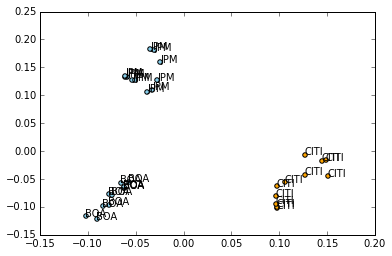

In [181]:
xs, ys = pos[:, 0], pos[:, 1]

# short versions of filenames:
#names=['BOA-2014','BOA-2013','BOA-2012','BOA-2011','BOA-2010','BOA-2009','BOA-2008','BOA-2007','BOA-2006','BOA-2005','BOA-2004', 'JPM-2014','JPM-2013','JPM-2012','JPM-2011','JPM-2010','JPM-2009','JPM-2008','JPM-2007','JPM-2006','JPM-2005','JPM-2004','CITI-2014','CITI-2013','CITI-2012','CITI-2011','CITI-2010','CITI-2009','CITI-2008','CITI-2007','CITI-2006','CITI-2005','CITI-2004']
names=['BOA','BOA','BOA','BOA','BOA','BOA','BOA','BOA','BOA','BOA','BOA', 'JPM','JPM','JPM','JPM','JPM','JPM','JPM','JPM','JPM','JPM','JPM','CITI','CITI','CITI','CITI','CITI','CITI','CITI','CITI','CITI','CITI','CITI']
#names=[ '2014','2013','2012','2011','2010','2009','2008','2007','2006','2005','2004']
# color-blind-friendly palette
for x, y, name in zip(xs, ys, names):
     color = 'orange' if "CITI" in name  else 'skyblue'
     plt.scatter(x, y, c=color)
     plt.text(x, y, name)

# Topic Model preparation and calculation

In [9]:
def split_text(filename, n_words):
     """Split a text into chunks approximately `n_words` words in length."""
     # input = open(filename, 'r')
     # words = input.read().split(' ')
     words =filename.split(' ')   
     # input.close()
     chunks = []
     current_chunk_words = []
     current_chunk_word_count = 0
     for word in words:
         current_chunk_words.append(word)
         current_chunk_word_count += 1
         if current_chunk_word_count == n_words:
            chunks.append(' '.join(current_chunk_words))
            current_chunk_words = []
            current_chunk_word_count = 0
     chunks.append(' '.join(current_chunk_words) )
     return chunks
    
chunk_length = 1000
chunks = []
num_reviews = 33
chunks = []

for i in xrange( 0, num_reviews ):
     chunk_counter = 0
     texts = split_text(clean_annuals[i], chunk_length)
     for text in texts:
         chunk = {'text': text, 'number': chunk_counter, 'filename': i}
         chunks.append(chunk)
         chunk_counter += 1


# we started with 33 files
# and now we have:
len(chunks)

3049

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
# Now we create the sparse matrix
vectorizer44 = CountVectorizer(input='content',ngram_range=(1, 1),min_df=30, max_df=0.70)
# max_df at 70% just eliminates 33 frequent words
# i choose min_df=30 because it is just 1% of 3049 chunks, 
# deletes 65% of unfrequent words or 7000 words.
dtm44 = vectorizer44.fit_transform([c['text'] for c in chunks])
vocab44 = np.array(vectorizer44.get_feature_names())
dtm44 = dtm44.toarray()  # convert to a regular array
vocab44 = np.array(vocab44)

In [11]:
vocab44.shape

(3848,)

In [12]:
dtm44.shape

(3049, 3848)

In [13]:
#Find 20 topics using LDA

from __future__ import print_function
from time import time

#In LDA, the time complexity is proportional to (n_samples * iterations).
#import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

n_topics=20
max_iter=100
n_top_words=30
print("Fitting LDA models with tf ")
lda = LatentDirichletAllocation(n_topics=n_topics, max_iter=max_iter,
                                learning_method='online', learning_offset=50.,
                                random_state=0)
t0 = time()
word_topic=lda.fit(dtm44)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in LDA model:")
#tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, vocab44, n_top_words)

Fitting LDA models with tf 
done in 301.228s.

Topics in LDA model:
Topic #0:
tax accounting sfas fair company goodwill earnings reporting impairment statements taxes deferred fasb changes january effective guidance liabilities recorded intangible statement recognized entity adoption impact acquisition operations method issued effect
Topic #1:
firm chase jpmorgan report annual note internal statements pages reporting control accounting see sheets ended discussion results used private page respectively includes provide upon activities periods repurchase material operations heritage
Topic #2:
mortgage repurchase servicing securitization claims representations warranties corporation securitizations loss settlement gses mortgages assumptions private foreclosure liability msrs label investors adverse residential estimated future possible home whole unit principal first
Topic #3:
court district claims actions filed action corporation defendants class plaintiffs bank new litigation york compl

In [14]:
# Find Average topics per document (transform chunks to 33 docs)

doc_topic= lda.transform(dtm44)
doc_topic.shape

lista=()
num_chunks = 3049
for j in xrange(0,33):
    for i in xrange(0, num_chunks ):
        if chunks[i]['filename']==j:
            lista = lista + (j,)
            
lista=np.asarray(lista)[...,None]
all_data = np.append(doc_topic, lista, 1)
all_data.shape

(3049, 21)

In [ ]:
#Find average
results=[]
for x in sorted(np.unique(all_data[...,20])):
    results.append([np.average(all_data[np.where(all_data[...,20]==x)][...,0]), 
                    np.average(all_data[np.where(all_data[...,20]==x)][...,1]),
                    np.average(all_data[np.where(all_data[...,20]==x)][...,2]),
                    np.average(all_data[np.where(all_data[...,20]==x)][...,3]),
                    np.average(all_data[np.where(all_data[...,20]==x)][...,4]),
                    np.average(all_data[np.where(all_data[...,20]==x)][...,5]),
                    np.average(all_data[np.where(all_data[...,20]==x)][...,6]),
                    np.average(all_data[np.where(all_data[...,20]==x)][...,7]),
                    np.average(all_data[np.where(all_data[...,20]==x)][...,8]),
                    np.average(all_data[np.where(all_data[...,20]==x)][...,9]),
                    np.average(all_data[np.where(all_data[...,20]==x)][...,10]),
                    np.average(all_data[np.where(all_data[...,20]==x)][...,11]),
                    np.average(all_data[np.where(all_data[...,20]==x)][...,12]),
                    np.average(all_data[np.where(all_data[...,20]==x)][...,13]),
                    np.average(all_data[np.where(all_data[...,20]==x)][...,14]),
                    np.average(all_data[np.where(all_data[...,20]==x)][...,15]),
                    np.average(all_data[np.where(all_data[...,20]==x)][...,16]),
                    np.average(all_data[np.where(all_data[...,20]==x)][...,17]),
                    np.average(all_data[np.where(all_data[...,20]==x)][...,18]),
                    np.average(all_data[np.where(all_data[...,20]==x)][...,19]),x])

results=np.asarray(results)
results.shape

In [15]:
# Normalize results
results2 = np.round(results[:,0:20] / np.sum(results[:,0:20], axis=1, keepdims=True), decimals=4)   


(33, 21)

# Grap evolution of share of topics per year

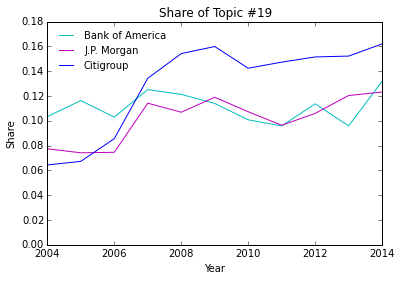

In [207]:

import matplotlib.pyplot as plt
import numpy as np

# Change numbertop variable to do the graph for an specific topic
numbertop=19
doctopic = results2[(10,9,8,7,6,5,4,3,2,1,0),numbertop]
doctopic2 = results2[(21,20,19,18,17,16,15,14,13,12,11),numbertop]
doctopic3 = results2[(32,31,30,29,28,27,26,25,24,23,22),numbertop]
docnames=[2004,2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014] 
plt.xlabel('Year')
plt.ylabel('Share')
plt.title('Share of Topic #%d' % numbertop)
topic_labels=['Bank of America', 'J.P. Morgan', 'Citigroup']

l2=plt.plot(docnames, doctopic, 'c-', docnames, doctopic2, 'm-', docnames, doctopic3, 'b-')
plt.legend(l2, topic_labels, loc='upper left', shadow=False,  prop={'size':10},frameon=False)
plt.ylim((0))
plt.show()


# Graph distance between documents using topic share

In [208]:
from sklearn.metrics.pairwise import cosine_similarity
#change range in dtm to select one particular company

#dist2 = 1 - cosine_similarity(results2[:,(0,2,3,4,5,7,8,10,11,12,15,16,17,18,19)])
dist2 = 1 - cosine_similarity(results2)
np.round(dist2, 2)

array([[ 0.  ,  0.03,  0.02, ...,  0.38,  0.39,  0.39],
       [ 0.03,  0.  ,  0.01, ...,  0.39,  0.39,  0.39],
       [ 0.02,  0.01, -0.  , ...,  0.4 ,  0.4 ,  0.4 ],
       ..., 
       [ 0.38,  0.39,  0.4 , ...,  0.  ,  0.01,  0.02],
       [ 0.39,  0.39,  0.4 , ...,  0.01,  0.  ,  0.02],
       [ 0.39,  0.39,  0.4 , ...,  0.02,  0.02,  0.  ]])

In [209]:
%matplotlib inline
import os  # for os.path.basename

import matplotlib.pyplot as plt

from sklearn.manifold import MDS

# two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist2)  # shape (n_components, n_samples)

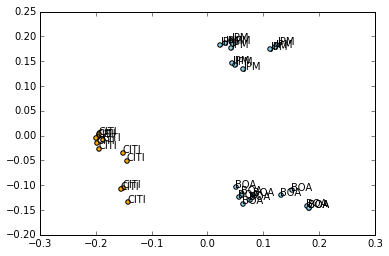

In [210]:
xs, ys = pos[:, 0], pos[:, 1]

# short versions of filenames:
#names=['BOA-2014','BOA-2013','BOA-2012','BOA-2011','BOA-2010','BOA-2009','BOA-2008','BOA-2007','BOA-2006','BOA-2005','BOA-2004', 'JPM-2014','JPM-2013','JPM-2012','JPM-2011','JPM-2010','JPM-2009','JPM-2008','JPM-2007','JPM-2006','JPM-2005','JPM-2004','CITI-2014','CITI-2013','CITI-2012','CITI-2011','CITI-2010','CITI-2009','CITI-2008','CITI-2007','CITI-2006','CITI-2005','CITI-2004']
names=['BOA','BOA','BOA','BOA','BOA','BOA','BOA','BOA','BOA','BOA','BOA', 'JPM','JPM','JPM','JPM','JPM','JPM','JPM','JPM','JPM','JPM','JPM','CITI','CITI','CITI','CITI','CITI','CITI','CITI','CITI','CITI','CITI','CITI']
#names=[ '2014','2013','2012','2011','2010','2009','2008','2007','2006','2005','2004','2014','2013','2012','2011','2010','2009','2008','2007','2006','2005','2004','2014','2013','2012','2011','2010','2009','2008','2007','2006','2005','2004']
# color-blind-friendly palette
for x, y, name in zip(xs, ys, names):
     color = 'orange' if "CITI" in name  else 'skyblue'
     plt.scatter(x, y, c=color)
     plt.text(x, y, name)